### Packages

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

### Data

The peaks of all events below collected from [New Zealand River Flood Statistics](https://niwa.maps.arcgis.com/apps/webappviewer/index.html?id=933e8f24fe9140f99dfb57173087f27d)

In [24]:
main_path = r"P:\Martin_publication\Grid_Orientation\Flow_multiple_events"

In [25]:
# Remove unnecessary dates
# Read origin file
flow2005_origin = pd.read_csv(
    fr"{main_path}\flow_2005event_origin.csv",
    names=['DateChar', 'Flow', 'Quality'],
    skiprows=[0],
    header=None
)


# # Convert time data to pandas
# flow2005_origin['DateTime'] = pd.to_datetime(flow2005_origin['DateChar'], format="%m/%d/%Y %H:%M:%S", utc=False)
# flow2005_origin['DateTime'] = flow2005_origin['DateTime'].dt.tz_localize(None)


# # Merge tide and flow
# date_start = r"2005-01-05 00:00:00"
# date_end = r"2005-01-07 00:00:00"
# flow2005_origin_filter = flow2005_origin.loc[(flow2005_origin.DateTime >= date_start)
#                                             & (flow2005_origin.DateTime <= date_end)]


# # Select column
# flow2005_origin_filter_selection = flow2005_origin_filter[['DateChar', 'Flow', 'Quality']]

# # Write out
# flow2005_origin_filter_selection.to_csv(fr"{main_path}\flow_2005event_filter_selection.csv", index=False)

### Conversion

The peaks of each flood event below could be collected from [NZ Flood Statistics Flow Gauge 2018](https://hub.arcgis.com/datasets/NIWA::nz-flood-statistics-henderson-collins-v2-layer/explore?layer=0&location=-40.926091%2C175.030522%2C12.21) or from [New Zealand River Flood Statistics](https://niwa.maps.arcgis.com/apps/webappviewer/index.html?id=933e8f24fe9140f99dfb57173087f27d)

In [26]:
# Peaks of each flood event
peak_5y = 195.99
peak_10y = 237.79
peak_20y = 277.89
peak_50y = 329.8
peak_1000y = 497.22

# Peak of January-2005 flood event
peak_Jan2005 = 381.167

# Inital flow discharge of January-2005 flood event
q1_Jan2005 = 4.687

# Number of file
no = "001"

In [27]:
def flow_conversion(df_origin, peak):
    """
    Definition:
                This is to generate flow data for different flood event
    References:
                None
    Arguments:
                df_origin (pandas dataframe):
                                                Dataframe of original flow (January 2005 in this case)
                peak (float):
                                                A value of maximum flow depth of that flood event
    Returns:
                (float):
                                                Flow values of that flood event
    """
    return ((df_origin.Flow - df_origin.Flow[0])/(df_origin.Flow.max() - df_origin.Flow[0])) * (peak - df_origin.Flow[0]) + df_origin.Flow[0]

5-year flood event

In [28]:
# Write out 5-year flood event
# Drop January-2005 flow column
flood_5y = flow2005_origin.drop(['Flow'], axis=1)

# Add flow column into the dataframe
flood_5y.insert(
    loc = 1,
    column = 'Flow',
    value = flow_conversion(flow2005_origin, peak_5y)
)

# Write out
flood_5y.to_csv(fr"{main_path}\flow_5yevent_{no}.csv")

In [29]:
# Check
print('max: ', flood_5y.Flow.max() == peak_5y)
print('inital: ', flood_5y.Flow[0] == q1_Jan2005)

max:  True
inital:  True


10-year flood event

In [30]:
# Write out 10-year flood event
# Drop January-20010 flow column
flood_10y = flow2005_origin.drop(['Flow'], axis=1)

# Add flow column into the dataframe
flood_10y.insert(
    loc = 1,
    column = 'Flow',
    value = flow_conversion(flow2005_origin, peak_10y)
)

# Write out
flood_10y.to_csv(fr"{main_path}\flow_10yevent_{no}.csv")

In [31]:
# Check
print('max: ', flood_10y.Flow.max() == peak_10y)
print('inital: ', flood_10y.Flow[0] == q1_Jan2005)

max:  True
inital:  True


20-year flood event

In [32]:
# Write out 20-year flood event
# Drop January-20020 flow column
flood_20y = flow2005_origin.drop(['Flow'], axis=1)

# Add flow column into the dataframe
flood_20y.insert(
    loc = 1,
    column = 'Flow',
    value = flow_conversion(flow2005_origin, peak_20y)
)

# Write out
flood_20y.to_csv(fr"{main_path}\flow_20yevent_{no}.csv")

In [33]:
# Check
print('max: ', flood_20y.Flow.max() == peak_20y)
print('inital: ', flood_20y.Flow[0] == q1_Jan2005)

max:  True
inital:  True


50-year flood event

In [34]:
# Write out 50-year flood event
# Drop January-20050 flow column
flood_50y = flow2005_origin.drop(['Flow'], axis=1)

# Add flow column into the dataframe
flood_50y.insert(
    loc = 1,
    column = 'Flow',
    value = flow_conversion(flow2005_origin, peak_50y)
)

# Write out
flood_50y.to_csv(fr"{main_path}\flow_50yevent_{no}.csv")

In [35]:
# Check
print('max: ', flood_50y.Flow.max() == peak_50y)
print('inital: ', flood_50y.Flow[0] == q1_Jan2005)

max:  True
inital:  True


1000-year flood event

In [36]:
# Write out 1000-year flood event
# Drop January-2001000 flow column
flood_1000y = flow2005_origin.drop(['Flow'], axis=1)

# Add flow column into the dataframe
flood_1000y.insert(
    loc = 1,
    column = 'Flow',
    value = flow_conversion(flow2005_origin, peak_1000y)
)

# Write out
flood_1000y.to_csv(fr"{main_path}\flow_1000yevent_{no}.csv")

In [37]:
# Check
print('max: ', flood_1000y.Flow.max() == peak_1000y)
print('inital: ', flood_1000y.Flow[0] == q1_Jan2005)

max:  True
inital:  True


-----------------------------------------------------------------------

In [38]:
discharge_list = [
    fr"{main_path}\flow_5yevent_001.csv",
    fr"{main_path}\flow_10yevent_001.csv",
    fr"{main_path}\flow_20yevent_001.csv",
    fr"{main_path}\flow_50yevent_001.csv",
    fr"{main_path}\flow_2005event_origin.csv",
    fr"{main_path}\flow_1000yevent_001.csv"
]

In [39]:
def flow_generation(flow_path):
    """
    Definition:
                This is to extract the flow data from the file
    References:
                None
    Arguments:
                flow_path (string):
                                    Directory of the flow path
    Returns:
                None
    """
    # Read file
    flow = pd.read_csv(
        flow_path,
        names=['DateChar', 'Flow', 'Quality'],
        skiprows=[0],
        header=None
    )
    
    # Convert time data
    flow['DateTime'] = pd.to_datetime(flow['DateChar'], format="%m/%d/%Y %H:%M:%S", utc=False)
    flow['DateTime'] = flow['DateTime'].dt.tz_localize(None)
    
    # Convert from NZST to UTC
    time_change = datetime.timedelta(hours=12)
    flow['DateTime'] = flow['DateTime'] - time_change
    
    # Filter time
    date_start = r"2005-01-05 00:00:00"
    date_end = r"2005-01-07 00:00:00"
    flow_filter = flow.loc[(flow.DateTime >= date_start)
                            & (flow.DateTime <= date_end)]

    
    return flow_filter

----------------------------------------------

#### Check

In [40]:
# 5-YEAR
f5y = flow_generation(discharge_list[0])
print(f5y['Flow'].max())
f5y

195.99


,DateChar,Flow,Quality,DateTime
144,01/05/2005 12:00:00,6.069638,0,2005-01-05 00:00:00
145,01/05/2005 12:05:00,6.104699,0,2005-01-05 00:05:00
146,01/05/2005 12:10:00,6.140269,0,2005-01-05 00:10:00
147,01/05/2005 12:15:00,6.188033,0,2005-01-05 00:15:00
148,01/05/2005 12:20:00,6.213948,0,2005-01-05 00:20:00
...,...,...,...,...
716,01/07/2005 11:40:00,16.689170,0,2005-01-06 23:40:00
717,01/07/2005 11:45:00,16.689170,0,2005-01-06 23:45:00
718,01/07/2005 11:50:00,16.640897,0,2005-01-06 23:50:00
719,01/07/2005 11:55:00,16.640897,0,2005-01-06 23:55:00


In [42]:
# 10-YEAR
f10y = flow_generation(discharge_list[1])
print(f10y['Flow'].max())
f10y

237.79


,DateChar,Flow,Quality,DateTime
144,01/05/2005 12:00:00,6.371746,0,2005-01-05 00:00:00
145,01/05/2005 12:05:00,6.414469,0,2005-01-05 00:05:00
146,01/05/2005 12:10:00,6.457810,0,2005-01-05 00:10:00
147,01/05/2005 12:15:00,6.516012,0,2005-01-05 00:15:00
148,01/05/2005 12:20:00,6.547589,0,2005-01-05 00:20:00
...,...,...,...,...
716,01/07/2005 11:40:00,19.311662,0,2005-01-06 23:40:00
717,01/07/2005 11:45:00,19.311662,0,2005-01-06 23:45:00
718,01/07/2005 11:50:00,19.252842,0,2005-01-06 23:50:00
719,01/07/2005 11:55:00,19.252842,0,2005-01-06 23:55:00


In [43]:
# 20-YEAR
f20y = flow_generation(discharge_list[2])
print(f20y['Flow'].max())
f20y

277.89


,DateChar,Flow,Quality,DateTime
144,01/05/2005 12:00:00,6.661568,0,2005-01-05 00:00:00
145,01/05/2005 12:05:00,6.711640,0,2005-01-05 00:05:00
146,01/05/2005 12:10:00,6.762437,0,2005-01-05 00:10:00
147,01/05/2005 12:15:00,6.830651,0,2005-01-05 00:15:00
148,01/05/2005 12:20:00,6.867660,0,2005-01-05 00:20:00
...,...,...,...,...
716,01/07/2005 11:40:00,21.827498,0,2005-01-06 23:40:00
717,01/07/2005 11:45:00,21.827498,0,2005-01-06 23:45:00
718,01/07/2005 11:50:00,21.758559,0,2005-01-06 23:50:00
719,01/07/2005 11:55:00,21.758559,0,2005-01-06 23:55:00


In [44]:
# 50-YEAR
f50y = flow_generation(discharge_list[3])
print(f50y['Flow'].max())
f50y

329.8


,DateChar,Flow,Quality,DateTime
144,01/05/2005 12:00:00,7.036746,0,2005-01-05 00:00:00
145,01/05/2005 12:05:00,7.096332,0,2005-01-05 00:05:00
146,01/05/2005 12:10:00,7.156781,0,2005-01-05 00:10:00
147,01/05/2005 12:15:00,7.237956,0,2005-01-05 00:15:00
148,01/05/2005 12:20:00,7.281997,0,2005-01-05 00:20:00
...,...,...,...,...
716,01/07/2005 11:40:00,25.084283,0,2005-01-06 23:40:00
717,01/07/2005 11:45:00,25.084283,0,2005-01-06 23:45:00
718,01/07/2005 11:50:00,25.002245,0,2005-01-06 23:50:00
719,01/07/2005 11:55:00,25.002245,0,2005-01-06 23:55:00


In [45]:
# 80-YEAR
f80y = flow_generation(discharge_list[4])
print(f80y['Flow'].max())
f80y

381.167


,DateChar,Flow,Quality,DateTime
144,01/05/2005 12:00:00,7.408,0,2005-01-05 00:00:00
145,01/05/2005 12:05:00,7.477,0,2005-01-05 00:05:00
146,01/05/2005 12:10:00,7.547,0,2005-01-05 00:10:00
147,01/05/2005 12:15:00,7.641,0,2005-01-05 00:15:00
148,01/05/2005 12:20:00,7.692,0,2005-01-05 00:20:00
...,...,...,...,...
716,01/07/2005 11:40:00,28.307,0,2005-01-06 23:40:00
717,01/07/2005 11:45:00,28.307,0,2005-01-06 23:45:00
718,01/07/2005 11:50:00,28.212,0,2005-01-06 23:50:00
719,01/07/2005 11:55:00,28.212,0,2005-01-06 23:55:00


In [46]:
# 1000-YEAR
f1000y = flow_generation(discharge_list[5])
print(f1000y['Flow'].max())
f1000y

497.22


,DateChar,Flow,Quality,DateTime
144,01/05/2005 12:00:00,8.246770,0,2005-01-05 00:00:00
145,01/05/2005 12:05:00,8.337040,0,2005-01-05 00:05:00
146,01/05/2005 12:10:00,8.428618,0,2005-01-05 00:10:00
147,01/05/2005 12:15:00,8.551594,0,2005-01-05 00:15:00
148,01/05/2005 12:20:00,8.618316,0,2005-01-05 00:20:00
...,...,...,...,...
716,01/07/2005 11:40:00,35.588056,0,2005-01-06 23:40:00
717,01/07/2005 11:45:00,35.588056,0,2005-01-06 23:45:00
718,01/07/2005 11:50:00,35.463771,0,2005-01-06 23:50:00
719,01/07/2005 11:55:00,35.463771,0,2005-01-06 23:55:00


--------------------------------------------------------------------------

### Plots

In [20]:
flow_list = []

for i in range(6):
    flow = flow_generation(discharge_list[i])
    flow_list.append(flow)

C:\Users\tmn52\AppData\Local\Temp\ipykernel_6096\404253876.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(


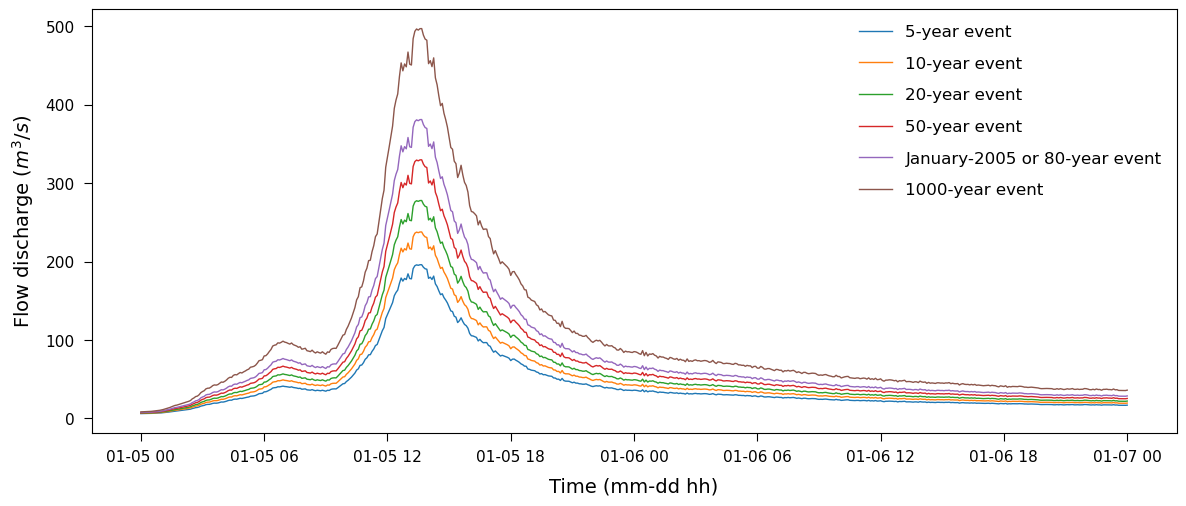

In [21]:
# Ref: https://stackoverflow.com/questions/63533664/matplotlib-vertical-space-between-legend-symbols
# https://stackoverflow.com/questions/34576059/reverse-the-order-of-a-legend
fig, ax = plt.subplots(figsize=(14, 5.5))

plots = []

for each_plot in range(len(flow_list)):
    
    plot = ax.plot(flow_list[0].DateTime, flow_list[each_plot].Flow, linewidth=1)[0]
    plots.append(plot)
    
    
ax.legend(
    plots[::-1],
    labels=[
        '5-year event',
        '10-year event',
        '20-year event',
        '50-year event',
        'January-2005 or 80-year event',
        '1000-year event'
    ],
    loc='upper right',
    fontsize=12,
    frameon=False,
    labelspacing=1
)

ax.set_xlabel(r'Time (mm-dd hh)', fontsize=14, labelpad=9)
ax.set_ylabel(r'Flow discharge ($m^{3}/s$)', fontsize=14, labelpad=7)
ax.tick_params(axis='y', length=6, labelsize=11, pad=6)
ax.tick_params(axis='x', length=6, labelsize=11, pad=6)

plt.savefig(fr"{main_path}\multiple_floodevents.png", bbox_inches='tight', dpi=400)